1. **Importing Required Libraries**

Importing all the necessary packages and librraries like pandas, scikit learn, numpy.




In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

2. **Dataset loading and data exploration**

Loading the dataset which is in xls format and displaying first few records to explore data samples.

In [5]:
file_path = '/content/Rotten_Tomatoes_Movies3.xls'

df = pd.read_excel(file_path)

df.head() # display first few rows

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


3. **Data Cleaning and Preprocessing**

Cleaning and preprocess the data by handling missing values, formatting date columns, and ensuring all ratings are in a usable numeric format. It also removes rows with missing audience ratings for better analysis.

In [9]:
# Check for missing values - null or not

print(df.isnull().sum())

# Convert date columns to datetime format

df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], format='%m/%d/%Y', errors='coerce')
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'], format='%m/%d/%Y', errors='coerce')

# Drop rows with missing audience_rating (target variable)

df = df.dropna(subset=['audience_rating'])

# Convert tomatometer_rating to numeric

df['tomatometer_rating'] = pd.to_numeric(df['tomatometer_rating'], errors='coerce')

movie_title              0
movie_info              18
critics_consensus     8105
rating                   0
genre                   17
directors              104
writers               1277
cast                   260
in_theaters_date       719
on_streaming_date        1
runtime_in_minutes     147
studio_name            376
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating          0
dtype: int64


4. **Feature Selection and Target variable**

This code selects the features (`X`) and target variable (`y`), then removes rows with missing `tomatometer_rating` to keep them aligned.

In [10]:

# Select features and target variable

X = df[['rating', 'genre', 'directors', 'writers', 'cast', 'runtime_in_minutes', 'tomatometer_status', 'tomatometer_rating']]
y = df['audience_rating']

# Drop rows with missing tomatometer_rating

X = X.dropna(subset=['tomatometer_rating'])
y = y[X.index]  # Align y with X after dropping rows


5. **Splitting dataset into Train and Test data**

Split dataset into 2 categories - Train data (4/5) and test data (1/5)

Model is trained with train data and model performance will be evaluated with test data

In [11]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. **Column Transformer and Preprocessing Pipeline**

This code prepares the data by handling numeric and categorical features separately.

* Numeric features are imputed with the mean and scaled.
* Categorical features are converted to one-hot encoded values to make them suitable for machine learning models.

In [12]:
# Define the column transformer

numeric_features = ['runtime_in_minutes', 'tomatometer_rating']

categorical_features = ['rating', 'genre', 'directors', 'writers', 'cast', 'tomatometer_status']

from sklearn.impute import SimpleImputer

# Create the preprocessing pipeline with an imputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Handle unknown categories
    ])


7. **Model Pipeline Creation**

 Pipeline that first preprocesses the data (scaling numeric features and encoding categorical ones) and then applies a Random Forest Regressor to make predictions.

In [13]:
# Create the pipeline with a Random Forest Regressor

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

8. **Training the model**

 Trains the Random Forest Regressor on the processed data

In [14]:
# Train the model

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['runtime_in_minutes',
                                                   'tomatometer_rating']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['rating', 'genre',
                                                   'directors', 'writers',
                                                   'cast',
                                                   'tomatometer_status'])])),
                ('model', RandomForestRegressor(random_state=42))])

9. **Prediction on Test Set**

Display few  rows of test data and model prediction analysis with randomized test data  

In [15]:
import pandas as pd

# Check the shape of the test set
print("X_test shape:", X_test.shape)

# Check the first few rows of the test set
print("X_test head:\n", X_test.head())


X_test shape: (3278, 8)
X_test head:
       rating                                              genre  \
12480      R  Action & Adventure, Art House & International,...   
8857       R                                 Action & Adventure   
5249   PG-13                          Action & Adventure, Drama   
7596      NR               Classics, Horror, Mystery & Suspense   
4164   PG-13                                      Comedy, Drama   

               directors                                     writers  \
12480        Je-gyu Kang                                 Je-kyu Kang   
8857     Peter MacDonald           Sheldon Lettich, Rebecca Morrison   
5249          Jay Craven                                  Jay Craven   
7596      Robert Aldrich  Henry Farrall, Lukas Heller, Henry Farrell   
4164   Peter Bogdanovich                                Steven Peros   

                                                    cast  runtime_in_minutes  \
12480              Han Suk-kyu, Song Kang Ho, 

In [16]:
try:
    if X_test.shape[0] >= 10:
        # Randomly select 10 records
        random_sample = X_test.sample(n=10, random_state=42)

        # Make predictions for the randomly selected records
        y_pred = pipeline.predict(random_sample)
        print("Randomly selected records for prediction:\n", random_sample)
        print("Predictions for the randomly selected records:\n", y_pred)

    else:
        print("X_test contains fewer than 10 records. Total records:", X_test.shape[0])
except Exception as e:
    print("Error during prediction:", e)

Randomly selected records for prediction:
       rating                                              genre  \
7016       R                                      Drama, Horror   
15110      R                                              Drama   
8390      NR             Art House & International, Documentary   
3         NR                                    Classics, Drama   
15159      R                                      Comedy, Drama   
11727      R             Action & Adventure, Mystery & Suspense   
1310   PG-13                          Action & Adventure, Drama   
3109      PG  Action & Adventure, Animation, Science Fiction...   
12987      R                                     Comedy, Horror   
13884  PG-13                                             Comedy   

                             directors  \
7016    John Carpenter, Rick Rosenthal   
15110                  Alexandre Moors   
8390   Michael Tucker, Petra Epperlein   
3                         Sidney Lumet   
15159    

10. **Model Evaluation**

Evaluates the model's performance by calculating key metrics like MAE, RMSE, R² and MAPE

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# First few actual and predicted values for inspection
print("First few actual values:", y_test[:5])
print("First few predicted values:", y_pred[:5])

y_pred = pipeline.predict(X_test)

# Calculate mae
mae = mean_absolute_error(y_test, y_pred)

# Calculate mse and rmse
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Safe MAPE calculation
def safe_mape(y_true, y_pred):
    # Avoid division by zero
    non_zero_indices = y_true != 0
    if non_zero_indices.sum() == 0:
        return np.inf  # Return infinity if all values are zero
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

mape = safe_mape(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')



First few actual values: 12480    69.0
8857     30.0
5249     44.0
7596     85.0
4164     51.0
Name: audience_rating, dtype: float64
First few predicted values: [38.66 49.71 77.97 89.43 53.  ]
Mean Absolute Error: 11.61
Root Mean Squared Error: 15.00
R-squared: 0.45


11. **Hyperparameter Optimization Using RandomizedSearchCV for Random Forest**

RandomizedSearchCV is used to find the best settings for the model, so it works more effectively and makes better predictions. It helps the model learn in the best possible way by testing different options and choosing the ones that give the best results.

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter distribution for Random Forest
param_dist = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2', None],
    'model__bootstrap': [True]
}

# Create the RandomizedSearchCV object

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=7,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-validation Score:", random_search.best_score_)

# Get the best model from the random search
best_model = random_search.best_estimator_ # final selection

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
print("Test Set R-squared:", r2_score(y_test, y_pred))

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': 10, 'model__bootstrap': True}
Best Cross-validation Score: 0.49329521418854333
Test Set R-squared: 0.48668995530195025
Mean Absolute Error: 11.56
Root Mean Squared Error: 14.56


We can also increase the number of estimators, adjust the maximum depth, or modify other settings like min_samples_split and max_features to improve accuracy.

12. **Visualization of Model Performance and Residual Analysis**

Visualizes the model's predictions and calculates evaluation metrics like MAE and RMSE to assess its performance.

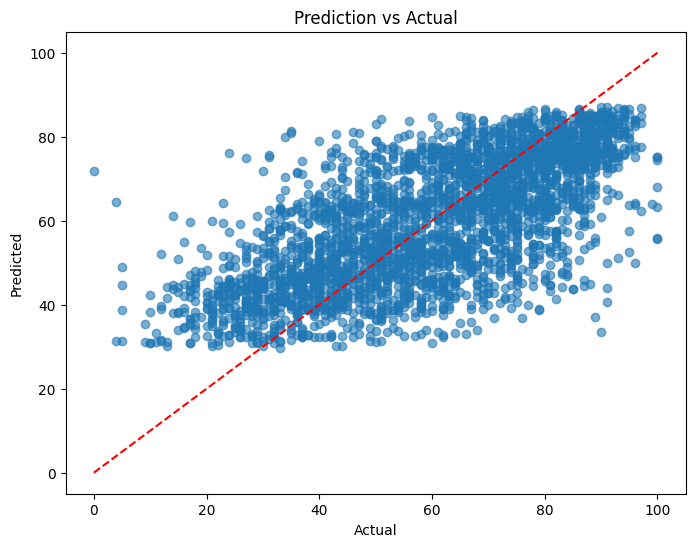

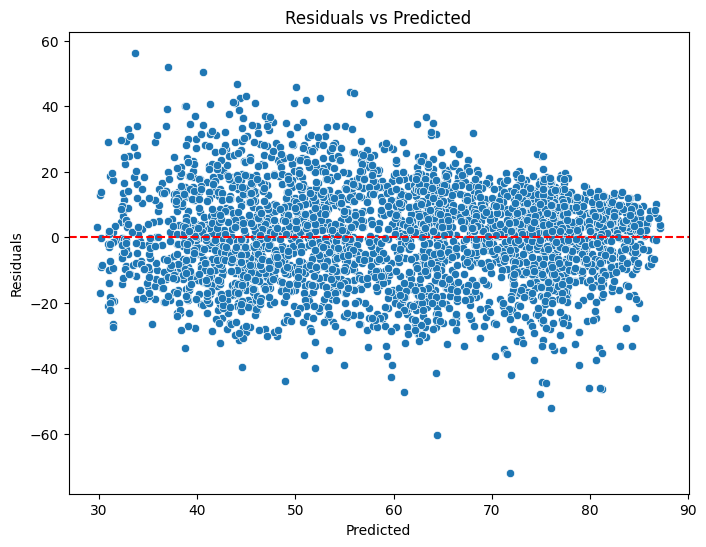

Mean Absolute Error: 11.56
Root Mean Squared Error: 14.56


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = best_model.predict(X_test)

# 1. Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prediction vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')


In [22]:
# Save the trained model, so you can load and use it without retraining

import joblib

joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']